# CROSS-TESTING: Balanced vs Imbalanced Models

In [1]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Load Models and Vectorizers

In [2]:
import os
import joblib

# Define the models directory
model_dir = r"..\models"  # Replace with the correct path if different

# Load models
model_balanced = joblib.load(os.path.join(model_dir, "Model_Balanced.pkl"))      # Model A
model_imbalanced = joblib.load(os.path.join(model_dir, "Model_Imbalanced.pkl"))  # Model B

# Load vectorizers
vectorizer_balanced = joblib.load(os.path.join(model_dir, "tfidf_Balanced.pkl"))
vectorizer_imbalanced = joblib.load(os.path.join(model_dir, "tfidf_Imbalanced.pkl"))

print("Models and TF-IDF Vectorizers loaded successfully.\n")



Models and TF-IDF Vectorizers loaded successfully.



# Load Test Sets

In [3]:

# Define data directories
data_dir_balanced = r"..\data\new data"
data_dir_imbalanced =r"..\data\new data"

# Load test datasets
balanced_test = pd.read_csv(os.path.join(data_dir_balanced, "balanced_test.csv"), encoding='latin-1')
imbalanced_test = pd.read_csv(os.path.join(data_dir_imbalanced, "imbalanced_test.csv"), encoding='latin-1')

# Print shapes
print("Balanced Test Set Shape:", balanced_test.shape)
print("Imbalanced Test Set Shape:", imbalanced_test.shape)

# Quick preview
print("\nBalanced Test Set Sample:")
print(balanced_test.head())

print("\nImbalanced Test Set Sample:")
print(imbalanced_test.head())


Balanced Test Set Shape: (2482, 2)
Imbalanced Test Set Shape: (7338, 2)

Balanced Test Set Sample:
                                              Review  Rating
0  enjoy book find hurrying work able enjoy roman...       4
1  start read blind heat literally finish book go...       5
2  update 1014my bad not know book 5 lose shifter...       2
3  short point write ok sex steamy short liking n...       3
4  terrible short story definitely short grotesqu...       3

Imbalanced Test Set Sample:
                                              Review  Rating
0  post romancing book blogreviewe bymollyreview ...       3
1  book wonderful example historical fiction felt...       4
2  hot erotic sweet fast read maybe fast interest...       4
3  fun holidaywinter anthology nice variety story...       4
4  love far not read devyn dawson not love m big ...       5


# CROSS-TEST 1: Model_A (Balanced) on Imbalanced Test Set

Accuracy: 0.4711

              precision    recall  f1-score   support

           1     0.2457    0.6235    0.3525       255
           2     0.2775    0.3471    0.3084       582
           3     0.2145    0.3833    0.2751       694
           4     0.6479    0.4089    0.5014      3470
           5     0.5570    0.6038    0.5795      2337

    accuracy                         0.4711      7338
   macro avg     0.3885    0.4733    0.4034      7338
weighted avg     0.5346    0.4711    0.4844      7338



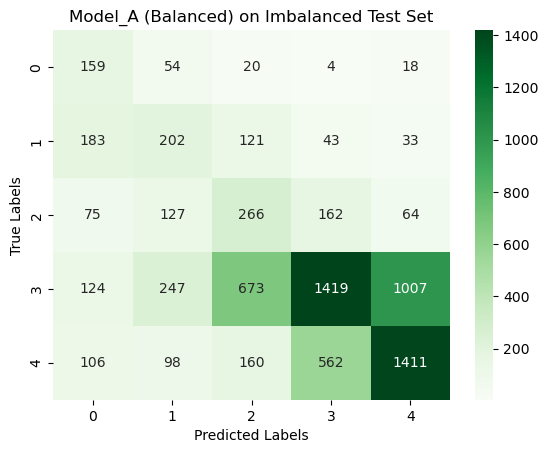

In [4]:
X_imb_tfidf_for_balanced = vectorizer_balanced.transform(imbalanced_test["Review"])
y_imb_true = imbalanced_test["Rating"]

y_imb_pred_from_balanced = model_balanced.predict(X_imb_tfidf_for_balanced)

print(f"Accuracy: {accuracy_score(y_imb_true, y_imb_pred_from_balanced):.4f}\n")
print(classification_report(y_imb_true, y_imb_pred_from_balanced, digits=4))

cm1 = confusion_matrix(y_imb_true, y_imb_pred_from_balanced)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens')
plt.title('Model_A (Balanced) on Imbalanced Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# CROSS-TEST 2: Model_B (Imbalanced) on Balanced Test Set

Accuracy: 0.4537

              precision    recall  f1-score   support

           1     0.5161    0.4536    0.4828       496
           2     0.3525    0.6069    0.4459       496
           3     0.4404    0.1707    0.2460       498
           4     0.4342    0.4202    0.4271       495
           5     0.5904    0.6177    0.6037       497

    accuracy                         0.4537      2482
   macro avg     0.4667    0.4538    0.4411      2482
weighted avg     0.4668    0.4537    0.4410      2482



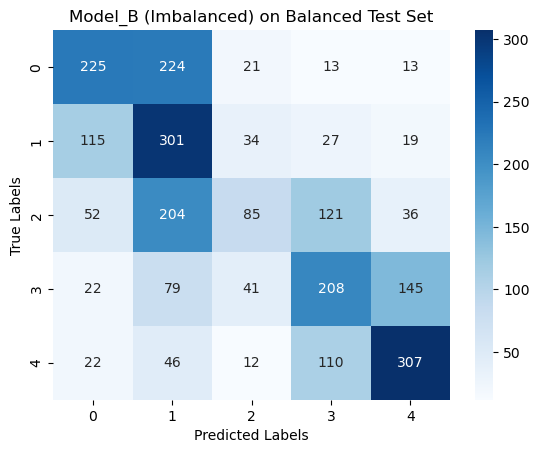

In [5]:
X_bal_tfidf_for_imbalanced = vectorizer_imbalanced.transform(balanced_test["Review"])
y_bal_true = balanced_test["Rating"]

y_bal_pred_from_imbalanced = model_imbalanced.predict(X_bal_tfidf_for_imbalanced)

print(f"Accuracy: {accuracy_score(y_bal_true, y_bal_pred_from_imbalanced):.4f}\n")
print(classification_report(y_bal_true, y_bal_pred_from_imbalanced, digits=4))

cm2 = confusion_matrix(y_bal_true, y_bal_pred_from_imbalanced)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Model_B (Imbalanced) on Balanced Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



# Summary Comparison

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Compute metrics for Model_A (Balanced) on Imbalanced Test Set
acc_bal_on_imb = accuracy_score(y_imb_true, y_imb_pred_from_balanced)
prec_bal_on_imb = precision_score(y_imb_true, y_imb_pred_from_balanced, average='macro')
rec_bal_on_imb = recall_score(y_imb_true, y_imb_pred_from_balanced, average='macro')
f1_bal_on_imb = f1_score(y_imb_true, y_imb_pred_from_balanced, average='macro')

# Compute metrics for Model_B (Imbalanced) on Balanced Test Set
acc_imb_on_bal = accuracy_score(y_bal_true, y_bal_pred_from_imbalanced)
prec_imb_on_bal = precision_score(y_bal_true, y_bal_pred_from_imbalanced, average='macro')
rec_imb_on_bal = recall_score(y_bal_true, y_bal_pred_from_imbalanced, average='macro')
f1_imb_on_bal = f1_score(y_bal_true, y_bal_pred_from_imbalanced, average='macro')

# Create summary DataFrame
summary_df = pd.DataFrame({
    "Model": ["Model_A (Balanced)", "Model_B (Imbalanced)"],
    "Test Set": ["Imbalanced Test Set", "Balanced Test Set"],
    "Accuracy": [acc_bal_on_imb, acc_imb_on_bal],
    "Precision (Macro)": [prec_bal_on_imb, prec_imb_on_bal],
    "Recall (Macro)": [rec_bal_on_imb, rec_imb_on_bal],
    "F1-Score (Macro)": [f1_bal_on_imb, f1_imb_on_bal]
})


print(" Cross-Test Summary: \n")
summary_df



 Cross-Test Summary: 



,Model,Test Set,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,Model_A (Balanced),Imbalanced Test Set,0.471109,0.388546,0.473319,0.403381
1,Model_B (Imbalanced),Balanced Test Set,0.453666,0.466710,0.453815,0.441124
